# **Task C2**
## Plotting the Avocado Data using Pandas and Seaborn

##### This task uses the avocado dataset. The dataset contains historical data on avocado prices and sales volume in multiple U.S. markets. One of the columns in this dataset, Unnamed: 0, contains sequential numbers that are irrelevant to analyzing this data. Three of the other columns contain sales for PLU (price look-up) codes 4046, 4225, and 4770. These columns will not be used in this task. If you review the data, you’ll see that some of the regions overlap. For example, one of the regions is the entire U.S., and all of the other regions are parts of the U.S. Because of that, you would need to review this data carefully before determining the best way to analyze it. For the purposes of this task though, the overlapping regions won’t be taken into consideration.

##### https://www.kaggle.com/neuromusic/avocado-prices

<img src="avocado-logo.png" alt="SIT112 Avocado!" width="1800" height="200">


### A. Instructions

1. Make sure you have completed Task P3 before working on this task. 
2. Complete the task based on the comments and hints provided in the following sections.   
3. Complete the TaskCompletionReport from. 
4. Before submission, please make sure you have executed all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
5. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution (code) as an "ipynb" file (do not zip/combine them). You can do this by the end of Week 12, but feedback will only be provided for submissions received by the due date. <font color="red">Please do not include the dataset in your submission. </font>
6. The workshops are the primary venue for you to seek help if you need any clarification/assistance. The tutors are there to help you complete and submit the tasks. Please avoid emailing your code or screenshots to the tutors outside workshop hours. 
7. Consider using online resources such as ChatGPT to strengthen your undertanding of the task. 

Good luck :)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### B. Write Python code that performs (answers) the following operations (questions) 

##### 1. Read the data from the .csv file into a DataFrame and display the first five rows.

In [2]:
# Read the csv file into a dataframe
data = pd.read_csv('avocado.csv')
data.drop(columns=['Unnamed: 0','4046','4225','4770'], inplace=True)
data.Date = pd.to_datetime(data.Date)
data

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


##### 2. Filter the data to exclude the following regions: TotalUS, West, and NorthEast. Use the filtered data to create a DataFrame that contains the total of the Small Bags, Large Bags, and XLarge Bags columns grouped by type. Use the grouped data to create a bar plot that shows the number of small, large, and extra-large bags for both types of avocado. Set the tile and axis labels of the bar plot and make sure all the labels are readable. 

(array([0, 1]), [Text(0, 0, 'conventional'), Text(1, 0, 'organic')])

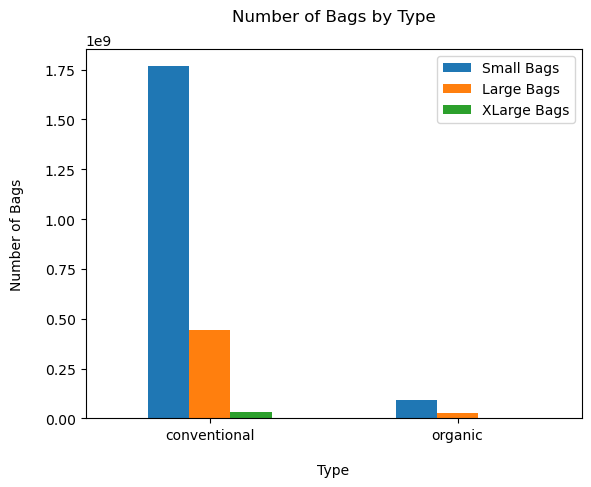

In [3]:
# Filter the data to exclude the specified regions
data = data.query('region != "TotalUS" and region != "West" and region != "NorthEast"')

# Group the filtered data by type and calculate the total number of small, large, and extra-large bags
data = data.groupby('type')[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()

# Create a bar plot using the grouped data
ax = data.plot.bar()

# # Set the title and axis labels with appropriate padding
ax.set_title('Number of Bags by Type', pad=20)
ax.set_xlabel('Type', labelpad=15)
ax.set_ylabel('Number of Bags', labelpad=15)
plt.xticks(rotation=0)

##### 3. Analyze the avocado data from 2016 to 2018, to identify the top six regions where the sum of the average price of avocados is the highest. Create a visualization containing a grid of subplots, where each subplot is a box plot showing the distribution of average prices of organic and conventional avocados from 2016 to 2018, for the top six regions identified.

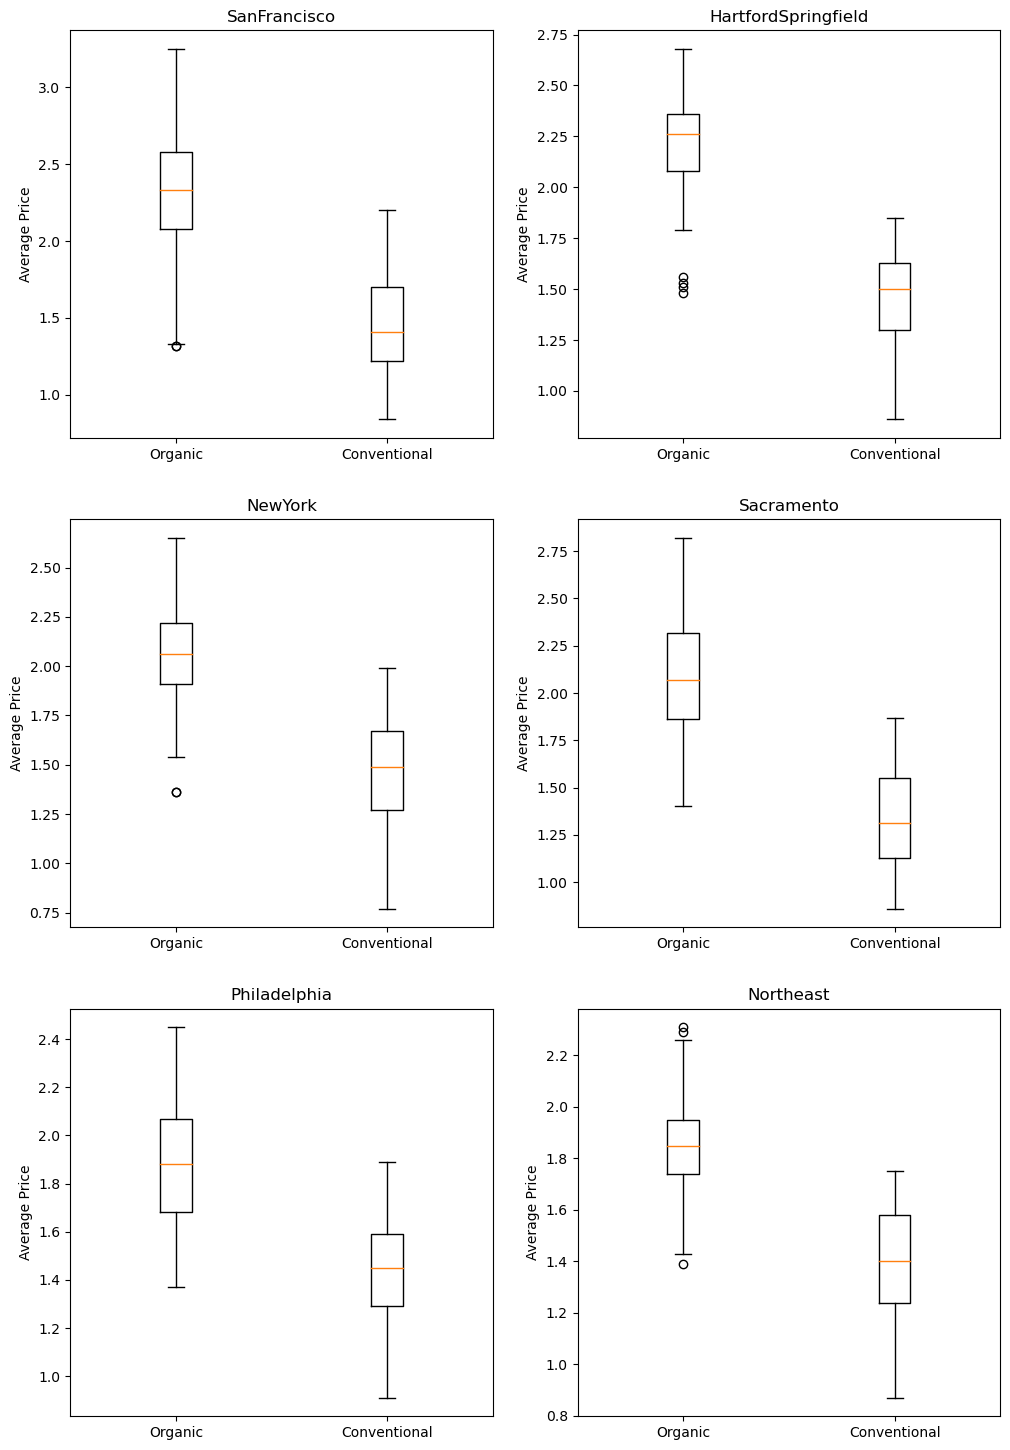

In [10]:
# Drop unnecessary columns
data = pd.read_csv('avocado.csv')
data.drop(columns=['Unnamed: 0','4046','4225','4770'], inplace=True)

# Filter the data to include only years 2016 to 2018
data1 = data[data['year'].isin([2016, 2017, 2018])]

# Group the filtered data by region and calculate the sum of average prices for each group
data2 = data1.groupby('region')[['AveragePrice']].sum()
data2.reset_index(inplace=True)

# Sort the regions by the sum of average prices in descending order
data2 = data2.sort_values('AveragePrice',ascending=False)

# Select the top 6 regions with the highest sum of average prices
top_6_regions = data2.region.head(6)

# Filter the data to include only the top 6 regions
top_regions_data = data1[data1['region'].isin(top_6_regions)]

# Create separate dataframes for organic and conventional avocados in the top 6 regions
organic = top_regions_data[top_regions_data['type'] == 'organic']
conventional = top_regions_data[top_regions_data['type'] == 'conventional']

# Create a 3x2 grid of subplots and flatten it into a 1D array of axes
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.ravel()

# For each of the top 6 regions, create a box plot of the distribution of average prices for organic and conventional avocados
for i, region in enumerate(top_6_regions):
    # Creating a temporary dataframe for each region
    region_organic = organic[organic['region'] == region]
    region_conventional = conventional[conventional['region'] == region]
     # Combine organic and conventional data of a specific region
    combined_data = [region_organic['AveragePrice'], region_conventional['AveragePrice']]
    axes[i].boxplot(combined_data, labels=['Organic', 'Conventional'])
    axes[i].set_title(region)
    axes[i].set_ylabel('Average Price')

    # Adjust the layout of the subplots to reduce overlap and show the plot
plt.tight_layout()

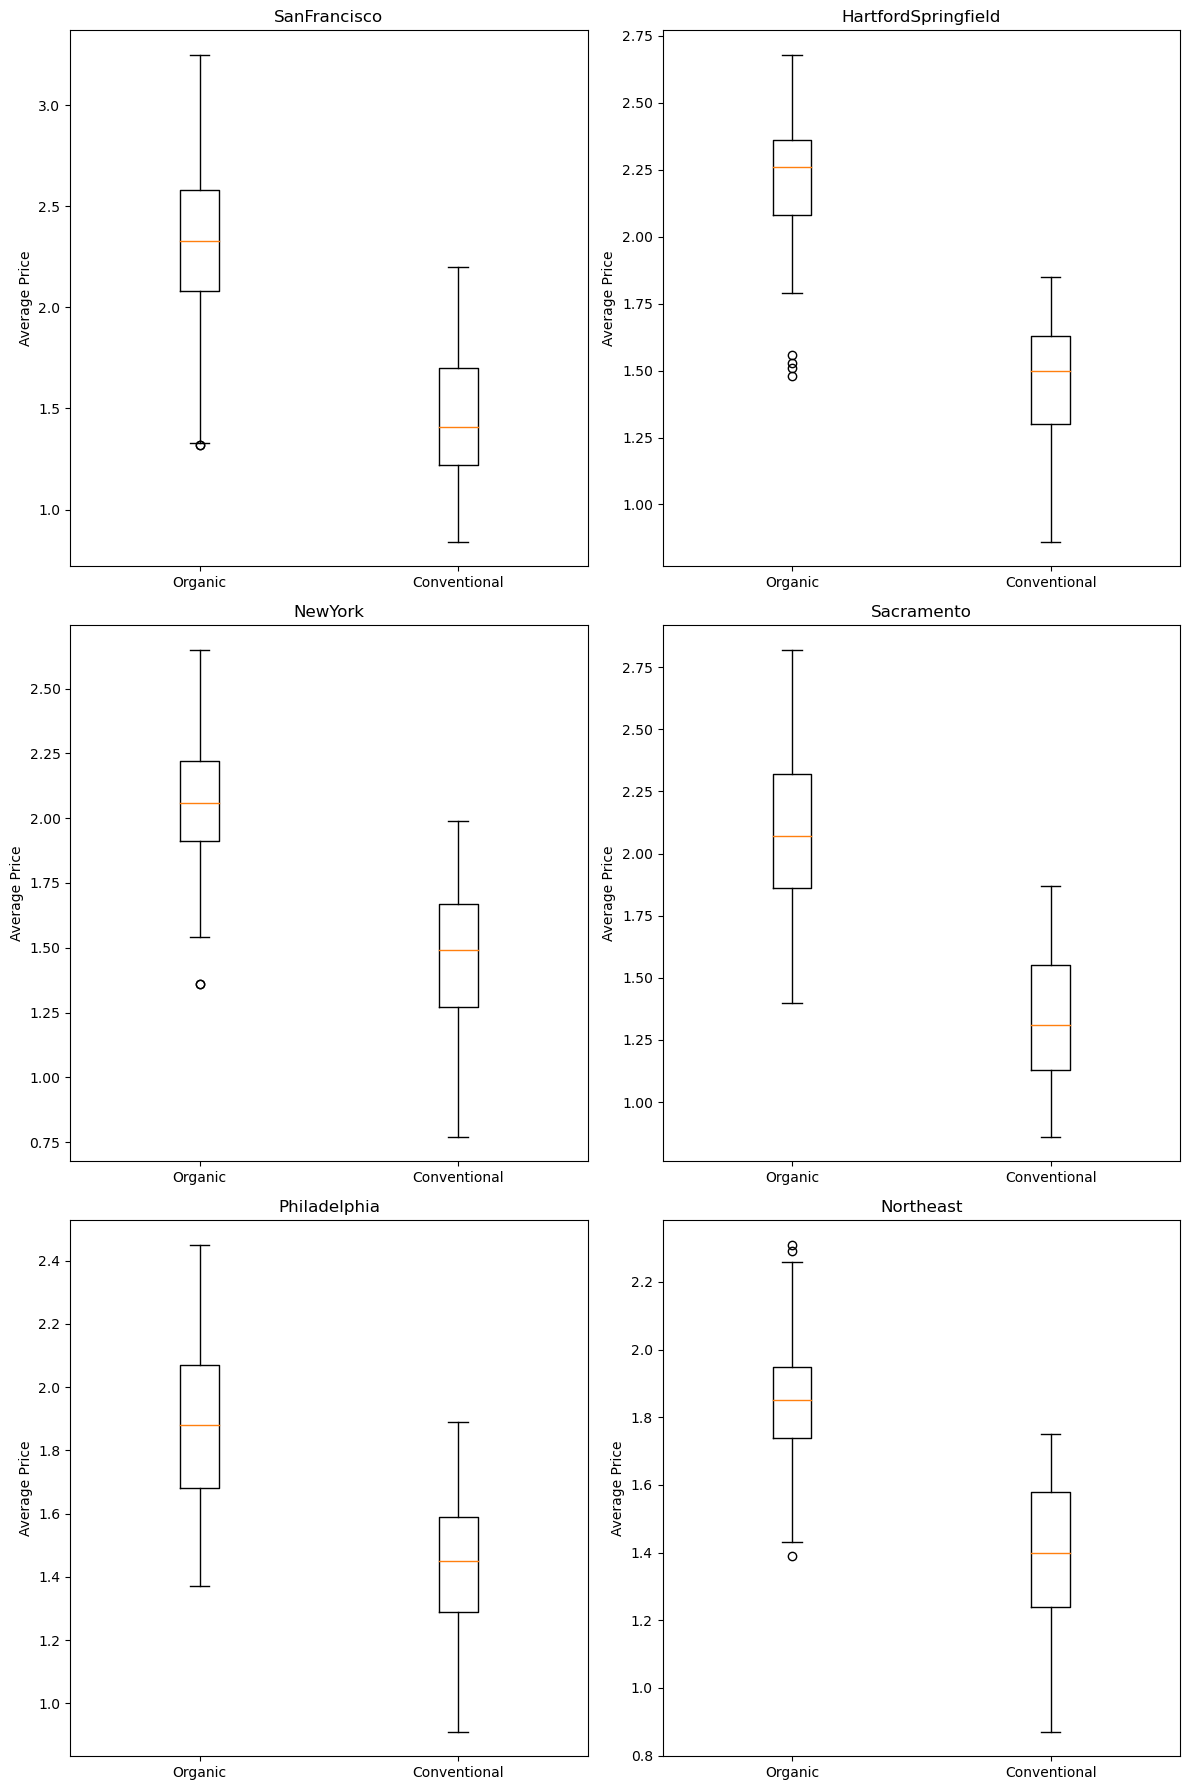### C. Learn more

* https://www.youtube.com/watch?v=jb_MvVFZXeU
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/gallery/index.html
* https://plotly.com/python/
* https://www.kaggle.com/code/kanncaa1/plotly-tutorial-for-beginners